# Projet numérique Lotka-Volterra

In [68]:
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import display
from math import floor, log, isnan
import autograd
import autograd.numpy as np

In [69]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

**Question 1**

On a :
$\begin{cases}
\dot x_1 = \alpha x_1 - \beta x_1x_2 \\
\dot x_2 = -\gamma x_2 + \delta x_1x_2
\end{cases}$
avec $x_1$ le nombre de proies et $x_2$ le nombre de prédateurs et ($\alpha$,$\beta$,$\gamma$,$\delta$) des paramètre strictement positifs.

Ce sytème correspond à l'équation $\dot x = f(x_1,x_2)$ avec 

$\begin{cases}
f:\mathbf{R^2_{>0}}\longrightarrow \mathbf{R^2}\\
x = (x_1,x_2) \longrightarrow (\alpha x_1 - \beta x_1x_2 \, -\gamma x_2 + \delta x_1x_2)
\end{cases}$


$\alpha$ correspond au taux de reproduction des proies et $\beta$ au taux de mortalité des proies (mangées par prédateurs).

$\gamma$ correspond au pourcentage de prédateurs qui meurent et $\delta$ au pourcentage de ceux qui se reproduisent car ils ont mangés des proies.

A l'équilibre, $\dot x_1 = 0$ et $\dot x_2 = 0$ ce qui donne, 
$\begin{cases}
\alpha x_1 = \beta x_1x_2\\
\gamma x_2 = \delta x_1x_2
\end{cases}$
donc 
$x_1 = 0$ ou $x_2 = \frac {\alpha} {\beta}$ et
$x_2 = 0$ ou $x_1 = \frac {\gamma} {\delta}$.

Cela donne donc 2 points d'équilibres : (0,0) et $\overline{x}$ = ($\frac {\gamma} {\delta}$, $\frac {\alpha} {\beta}$).

f est continûment différentiable donc on calcule la matrice jacobienne de la fonction pour étudier la stabilité de ces points d'équilibre :

$J_f (x_1,x_2) = \begin{pmatrix}\alpha - \beta x_2 &- \beta x_1 \\ \delta x_2 & -\gamma + \delta x_1\end{pmatrix} \quad $

$J_f(0,0) = \begin{pmatrix}\alpha & 0 \\0 & -\gamma\end{pmatrix} \quad $ Les 2 valeurs propres sont donc $\alpha$>0 et $-\gamma$<0. Il existe donc une valeur propre de $J_f(0,0)$ à partie réelle strictement positive donc (0,0) est un point d'équilibre instable. Ce point d'équilibre correspond à l'extinction des 2 espèces. Si le nombre de prédateur tend vers 0, les proies ne sont plus mangées et donc leur nombre tend vers l'infini. Cet état est donc instable.

$J_f(\overline{x}) = \begin{pmatrix}0 &\frac {-\beta\gamma}{\delta} \\\frac {\alpha\delta}{\beta} & 0\end{pmatrix} \quad$ La matrice admet 2 valeurs propres imaginaires pures conjuguées : $+i\sqrt{\alpha\gamma}$ et $-i\sqrt{\alpha\gamma}$. Leurs parties réelles étant nulles, on ne peut pas conclure sur la stabilité du point d'équilibre $\overline{x}$.


***Pour simplifier les notations dans les codes, $\alpha$, $\beta$, $\gamma$ et $\delta$ seront écrits a, b, c et d.***

**Question 2**

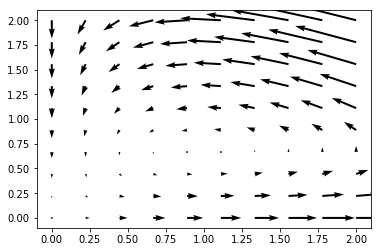

In [70]:
from matplotlib.pyplot import quiver, streamplot
import numpy as np
a = 0.2 
b = 0.3
c = 0.1
d = 0.1
[X,Y] = np.meshgrid([np.linspace(0,2,10)], [np.linspace(0,2,10)])
U = X*(a- b*Y)
V = Y*(-c + d*X)
quiver(X, Y, U, V);

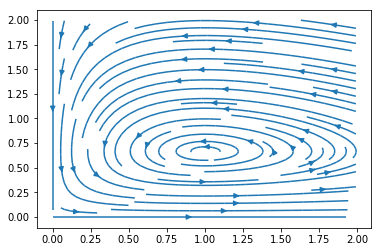

In [71]:
streamplot(X, Y, U, V);

Ces graphiques permettent de confirmer le fait que (0,0) soit une position d'équilibre instable car les solutions s'écartent de ce point. On peut aussi intuiter que $\overline{x}$ est une position d'équilibre stable car les solutions semblent tourner autour de ce point.

**Question 3**

Si $x_1(t=0)=0$ alors 
$\begin{cases}
\dot x_1 = 0 \\
\dot x_2 = -\gamma x_2
\end{cases}$
donc $\forall t>0$ : $\begin{cases}
x_1(t) = 0 \\
x_2(t) = x_2(t=0)exp(-\gamma t)
\end{cases}$

Si $x_2(t=0)=0$ alors
$\begin{cases}
\dot x_1 = \alpha x_1 \\
\dot x_2 = 0
\end{cases}$
donc $\forall t>0$ : $\begin{cases}
x_1(t) = x_1(t=0)exp(\alpha t) \\
x_2(t) = 0
\end{cases}$

Or d'après le théorème de Cauchy-Lipschitz, comme f est continûment différentiable par rapport à $(x_1, x_2)$, chaque problème de Cauchy admet une unique solution maximale. Ainsi si $x_1(t=0)>0$ et $x_2(t=0)>0$, la solution maximale pour cette condition initiale est différente de celle obtenue pour $x_1(t=0)=0$ ou $x_2(t=0)=0$ et, en particulier, ces solutions ne peuvent pas se couper.

Donc $x_1(t)$ et $x_2(t)$ ne s'annulent jamais pour tout $t>0$. De plus, d'après la contraposée du théorème des valeurs intermédiaires avec $x_1(t=0)>0$ et $x_2(t=0)>0$, $x_1(t)>0$ et $x_2(t)>0$ pour tout $t>0$.

**On a donc finalement que pour toute solution initialisée dans $\mathbf{R^2_{>0}}$, la solution maximale reste dans $\mathbf{R^2_{>0}}$ sur son ensemble de définition.**

**Question 4**

$H(x_1,x_2) = \delta x_1-\gamma \ln x_1 +\beta x_2-\alpha \ln x_2$

La fonction $H$ est continûment différentiable sur $(\mathbb{R}^*_+)^2$ comme somme et composée de fonctions continûment différentiables.

$$
\begin{align*}
\frac{d}{dt}H(x_1(t),x_2(t)) &=\langle \nabla H(x_1,x_2),f(x_1,x_2) \rangle\\
    &=\langle \begin{pmatrix} \delta - \frac{\gamma}{x_1}\\\beta - \frac{\alpha}{x_2}\end{pmatrix}, \begin{pmatrix} x_1(\alpha-\beta x_2)\\ -x_2(\gamma-\delta x_1)\end{pmatrix} \rangle\\
    &=(\delta - \frac{\gamma}{x_1})\times x_1(\alpha-\beta x_2)+(\beta - \frac{\alpha}{x_2})\times (-x_2)(\gamma-\delta x_1)\\
    &=(\delta x_1-\gamma)(\alpha-\beta x_2)-(\beta x_2 - \alpha)(\gamma-\delta x_1)\\
    &=x_1(\delta \alpha-\alpha \delta)+x_2(\gamma \beta-\beta \gamma)+x_1x_2(-\delta\beta+\beta \delta)+(-\gamma \alpha+\alpha \gamma)\\
    &=0
\end{align*}
$$


On pose $V(x_1,x_2)= H(x_1,x_2)-H(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$.

- La fonction $V$ est continûment différentiable sur $(\mathbb{R}^*_+)^2$ comme somme et composée de fonctions continûment différentiables.

- $V(\frac{\gamma}{\delta},\frac{\alpha}{\beta}) = 0$

- Montrons que $V(x_1,x_2)>0$

    Montrons que $(\frac{\gamma}{\delta},\frac{\alpha}{\beta}) $ est un minimum de $H$.
    
    $\frac{\partial H}{\partial x_1} = \delta - \frac{\gamma}{x_1}$ et $\frac{\partial H}{\partial x_2} = \beta - \frac{\alpha}{x_2}$

    Un extremum de $H$ est donc un point $(x_1,x_2)$ tel que $\begin{pmatrix} \frac{\partial H}{\partial x_1}\\ \frac{\partial H}{\partial x_2}\end{pmatrix} = \begin{pmatrix} \delta - \frac{\gamma}{x_1}\\ \beta - \frac{\alpha}{x_2} \end{pmatrix} = \begin{pmatrix} 0\\0 \end{pmatrix}$, ie $(x_1,x_2) = (\frac{\gamma}{\delta},\frac{\alpha}{\beta})$.

    Le seul extrémum de $V$ est donc en $(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ et vaut 0.

    Or, pour $x_1 = 2\frac{\gamma}{\delta}$ et $x_2 = 2\frac{\alpha}{\beta}$,

    $$
    \begin{align*}
    V(x_1,x_2)&=H(2\frac{\gamma}{\delta},2\frac{\alpha}{\beta})-H(\frac{\gamma}{\delta},\frac{\alpha}{\beta})\\
    &=\delta \times 2\frac{\gamma}{\delta}-\gamma \ln (2\frac{\gamma}{\delta}) +\beta \times 2\frac{\alpha}{\beta}-\alpha \ln (2\frac{\alpha}{\beta}) -(\delta \times \frac{\gamma}{\delta}-\gamma \ln \frac{\gamma}{\delta} +\beta \times \frac{\alpha}{\beta}-\alpha \ln (\frac{\alpha}{\beta}))\\
    &= \gamma (1- \ln (2)) +\alpha(1-\ln (2))\\
    &>0 \mathrm{~car~}\gamma>0 \mathrm{~et~}\alpha >0
    \end{align*}
    $$

    L'extrémum atteint en $(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ est donc un minimum.

    Donc $V(x_1,x_2)>0$ pour tout $(x_1,x_2)\in (\mathbb{R}^*_+)^2\setminus(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$

Donc $V$ est une fonction de Lyapunov.


$$
\begin{align*}
\frac{d}{dt}V(x_1(t),x_2(t)) &= \frac{d}{dt}(H(x_1,x_2) + H(\frac{\gamma}{\delta},\frac{\alpha}{\beta}))\\
&= \frac{d}{dt}H(x_1(t),x_2(t))\\
&= 0
\end{align*}
$$

Les solutions restent donc bornées en temps positif.

D'après le théorème du domaine maximal d'existence, comme $f$ est continue sur $(\mathbb{R}^*_+)^2$, la solution maximale n'est pas définie pour tout $t\ge 0$ si et seulement si elle explose en temps fini.

**Or ce n'est pas le cas ici donc toute solution maximale initialisée dans $(\mathbb{R}^*_+)^2$ est définie sur $\mathbb{R}$.**

**Question 5**

In [72]:
def H(x1, x2):
    return (d*x1 - c*np.log(x1) + b*x2 -a*np.log(x2))

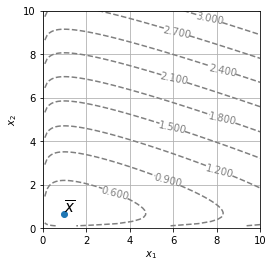

In [73]:
display_contour(
    H, 
    x=np.linspace(0, 10, 100), 
    y=np.linspace(0, 10, 100), 
    levels=10
)

plt.scatter(c/d, a/b)
plt.text(c/d, a/b, '$\overline{x}$', fontsize = 15);

$\overline{x}$ se situe au centre des courbes de niveaux de la fonction H. Les solutions convergent donc vers $\overline{x}$. Ainsi, $\overline{x}$ est bien graphiquement stable car toute solution maximale devient infiniment proche de ce point.

**Question 6**

In [74]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = [t0 + k*dt for k in range(0, int(np.floor((tf-t0)/dt)))]
    t.append(tf)
    N = len(t)
    d = np.array(x0).size
    x = np.zeros((d, N))
    x[:, 0] = x0
    for i in range (1, N):
        x[:, i] = x[:, i-1] + dt*f(t[i-1], x[:, i-1])
    return t, x

In [75]:
#test sur dx/dt = b*x
b=0.1
c=0.2
def f2(t, X):
    return(np.array([b*X[0], c*X[1]]))

In [76]:
solve_euler_explicit(f2, np.array([1, 2]), 1, 0, 5)

([0, 1, 2, 3, 4, 5],
 array([[1.     , 1.1    , 1.21   , 1.331  , 1.4641 , 1.61051],
        [2.     , 2.4    , 2.88   , 3.456  , 4.1472 , 4.97664]]))

In [77]:
#test sur d2x/dt2 = b**2*x
def f1(t, X):
    return np.array([X[1], b**2*X[0]])

In [78]:
solve_euler_explicit(f1, np.array([0, 1]), 1, 0, 5)

([0, 1, 2, 3, 4, 5], array([[0.    , 1.    , 2.    , 3.01  , 4.04  , 5.1001],
        [1.    , 1.    , 1.01  , 1.03  , 1.0601, 1.1005]]))

Les tests effectués confirment que les résultats obetnus sont corrects mais imprécis à cause d'erreurs d'arrondi.

In [79]:
def max_erreur(theo, exp):
    return np.max(np.abs(theo-exp))

def ordre_convergence(f, x0, t0, tf, delta, sol_theo):
    n = floor((tf-t0)/delta)
    erreur = np.zeros(n)
    x = np.zeros(n)
    for i in range(0,n):
        dt = delta**i
        x[i] = dt
        t, exp = solve_euler_explicit(f, x0, dt, t0, tf)
        theo = sol_theo(t)
        erreur[i] = max_erreur(theo, exp)
    return x, erreur


In [80]:
def repr(x, erreur):
    log_x, log_erreur = -np.log(x)/(log(1/2)), np.log(erreur)

    plt.plot(x, erreur);
    plt.show()

    oc = (log_erreur[-1]-log_erreur[0])/(log_x[-1]-log_x[0])
    if isnan(oc):
        print("L'ordre de convergence est infini.")
    else:
        plt.plot(log_x, log_erreur)
        plt.grid()
        plt.xlabel('n tel que dt = $delta^{-n}$')
        plt.ylabel('log(erreur)')
        plt.show()
        print(f"L'ordre de convergence est {oc}.")

In [81]:
x, erreur = ordre_convergence(np.exp, 0, 0, 10, 1/2, np.exp)

repr(x,erreur)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-81-4f00c0de6d22>", line 1, in <module>
    x, erreur = ordre_convergence(np.exp, 0, 0, 10, 1/2, np.exp)
  File "<ipython-input-79-e4e698c10488>", line 11, in ordre_convergence
    t, exp = solve_euler_explicit(f, x0, dt, t0, tf)
  File "<ipython-input-74-77673126485c>", line 9, in solve_euler_explicit
    x[:, i] = x[:, i-1] + dt*f(t[i-1], x[:, i-1])
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2033, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_tra

KeyboardInterrupt: 

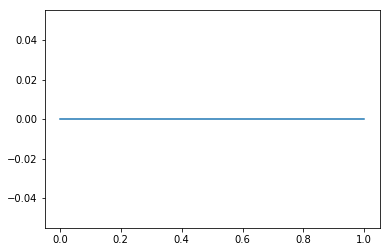

L'ordre de convergence est infini.


In [49]:
def un(t, x):
    return 1

def id(t):
    return t

x, erreur = ordre_convergence(un, 0, 0, 10, 1/2, id)

repr(x, erreur)

**Question 7**

In [50]:
#Volterra
a = 0.7
b = 0.5
c = 0.8
d = 0.5
def f(t, X):
    return np.array([X[0]*(a-b*X[1]), X[1]*(-c+d*X[0])])

In [51]:
t, [x1, x2] = solve_euler_explicit(f, np.array([1, 1]), 0.05, 0, 100)

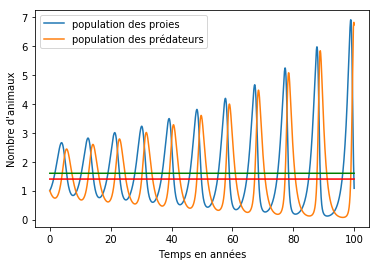

In [52]:
plt.plot(t, x1, label='population des proies')
plt.plot(t, x2, label='population des prédateurs')
plt.xlabel('Temps en années')
plt.ylabel("Nombre d'animaux")
plt.plot(t, c/d*np.ones(len(t)), color = 'g')
plt.plot(t, a/b*np.ones(len(t)), color = 'r')
plt.legend()
plt.show()

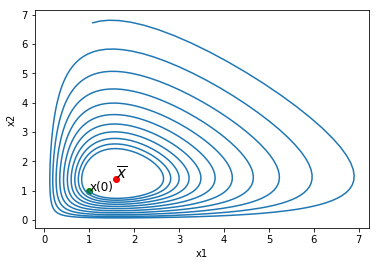

In [53]:
plt.plot(x1,x2)
plt.scatter(c/d,a/b, color = 'red')
plt.text(c/d, a/b, '$\overline{x}$', fontsize = 15)
plt.xlabel('x1')
plt.ylabel("x2")
plt.scatter(x1[0], x2[0], color = "g")
plt.text(x1[0], x2[0], 'x(0)', fontsize = 12)
plt.show()

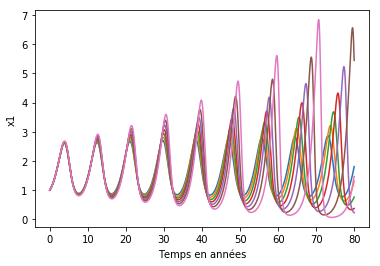

In [54]:
for i in range (1,8):
    t, [x1, x2] = solve_euler_explicit(f, np.array([1, 1]), i*0.01, 0, 80)
    plt.plot(t, x1)
plt.xlabel('Temps en années')
plt.ylabel('x1');

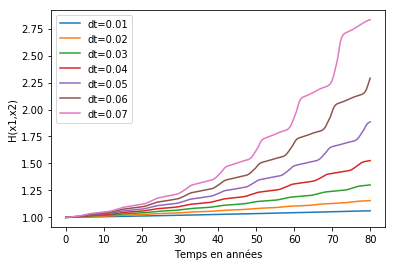

In [55]:
for i in range (1,8):
    t, [x1, x2] = solve_euler_explicit(f, np.array([1, 1]), i*0.01, 0, 80)
    plt.plot(t, H(x1,x2), label=f"dt={0.01*i}")
    plt.legend()
plt.xlabel('Temps en années')
plt.ylabel('H(x1,x2)');

Les solutions sont périodiques et ont une trajectoire fermée bornée. En effet les prédateurs se reproduisent beaucoup lorsque les proies sont nombreuses, mais finissent par épuiser leurs ressources (diminution du nombre de proies) et donc la population de prédateurs diminue. Lorsque la population de prédateurs est suffisamment faible, celle des proies ré-augmente car elles sont moins mangées par les prédateurs. Ainsi de suite, les 2 populations alternent entre croissance et diminution. Cette résolution semble donc fidèle à la réalité.

Cependant, on remarque que les solutions, tout comme H, divergent quand dt augmente donc la modélisation n'est pas fidèle aux temps longs. 

De plus, H n'est pas constante ce qui n'est pas cohérent avec la question 4 où l'on a vu que $\frac{d}{dt}H(x_1(t),x_2(t))=0$. Donc la méthode explicite est imprécise.

**Question 8**

In [56]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100, eps = 10e-5):
    t = [t0 + k*dt for k in range(0, int(np.floor((tf-t0)/dt)))]
    t.append(tf)
    N = len(t)
    d = np.array(x0).size
    x = np.zeros((d, N))
    x[:, 0] = x0
    for i in range (1, N):
        iter = 0
        xi0 = x[:,i-1] + dt*f(t[i], x[:,i-1])
        suiv = xi0
        while iter < itermax and (iter == 0 or np.linalg.norm(suiv - prec)/np.linalg.norm(xi0)>= eps):
            prec = suiv
            suiv = x[:,i-1] + dt*f(t[i], prec)
            iter +=1
        x[:, i] = suiv 
    return t, x

In [57]:
solve_euler_implicit(f2, np.array([1,2]), 1, 0, 5)

([0, 1, 2, 3, 4, 5],
 array([[1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
         1.60000000e+01, 3.20000000e+01],
        [2.00000000e+00, 9.99867077e+00, 4.99867086e+01, 2.49900321e+02,
         1.24933552e+03, 6.24584727e+03]]))

In [58]:
t, [x1, x2] = solve_euler_implicit(f, np.array([1, 1]), 0.05, 0, 100)

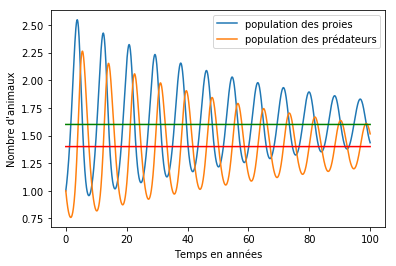

In [59]:
plt.plot(t, x1, label='population des proies')
plt.plot(t, x2, label='population des prédateurs')
plt.plot(t, c/d*np.ones(len(t)), color = 'g')
plt.plot(t,a/b*np.ones(len(t)), color = 'r')
plt.xlabel('Temps en années')
plt.ylabel("Nombre d'animaux")
plt.legend()
plt.show()

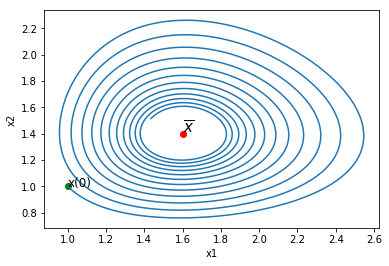

In [60]:
plt.plot(x1,x2)
plt.scatter(c/d,a/b, color = 'red')
plt.text(c/d, a/b, '$\overline{x}$', fontsize = 15)
plt.xlabel('x1')
plt.ylabel("x2")
plt.scatter(x1[0], x2[0], color ='g')
plt.text(x1[0], x2[0], 'x(0)', fontsize = 12)
plt.show()

Les solutions semblent bien converger vers le point d'équilibre $\overline{x}$.

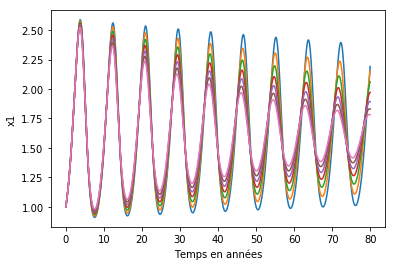

In [61]:
for i in range (1,8):
    t, [x1, x2] = solve_euler_implicit(f, np.array([1, 1]), i*0.01, 0, 80)
    plt.plot(t, x1)
plt.xlabel('Temps en années')
plt.ylabel('x1');

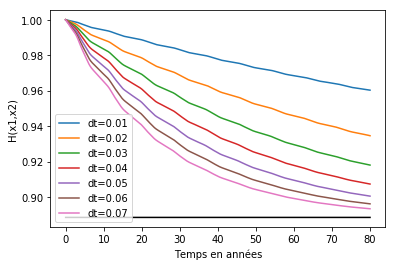

In [62]:
for i in range (1,8):
    t, [x1, x2] = solve_euler_implicit(f, np.array([1, 1]), i*0.01, 0, 80)
    plt.plot(t, H(x1,x2), label=f"dt={0.01*i}")
    plt.legend()
plt.xlabel('Temps en années')
plt.ylabel('H(x1,x2)')
plt.plot(t, [H(c/d, a/b)]*len(t), color = 'black');

On observe que H ne diverge plus mais semble au contraire tendre vers un $H(\overline{x})$. La méthode d'Euler implicite semble donc plus juste aux temps longs.

Cependant, H n'est pas constante ce qui n'est toujours pas cohérent avec la question 4 où l'on a vu que $\frac{d}{dt}H(x_1(t),x_2(t))=0$. Donc la méthode implicite est tout de même imprécise.

**Question 9**


D'après la question 4, pour $(x_1, x_2)$ solutions des équations de Lotka-Volterra, $\frac{d}{dt}H(x_1(t),x_2(t)) = 0$ et donc H est constante : $H(x_1,x_2) = H(x(0))$. Ainsi, si $H_0 = H(x(0))$, 

$\begin{cases}
\dot x_1 = x_1(\alpha - \beta x_2) -u_1(x_1,x_2)(H(x_1,x_2) - H_0) = x_1(\alpha - \beta x_2)\\
\dot x_2 = -x_2(\gamma - \delta x_1) - u_2(x_1,x_2)(H(x_1,x_2) - H_0) = -x_2(\gamma - \delta x_1)
\end{cases}$

On retrouve les mêmes équations que précedemment et donc les mêmes solutions que celles de Lotka-Volterra, et ce quelque soit $u:\mathbf{R^2}\longrightarrow \mathbf{R^2}$ continûment différentiable. Une solution de l'équation de Lotka-Volterra est donc bien solution de ce nouveau système.

Montrons maintenant que c'est l'unique solution possible. 

Le nouveau système se traduit par l'équation différentielle : $\dot x = g(x)$ avec 
$\begin{cases}
g:\mathbf{R^2_{>0}}\longrightarrow \mathbf{R^2}\\
x = (x_1,x_2) \longrightarrow (\alpha x_1 - \beta x_1x_2 -u_1(x_1,x_2)(H(x_1,x_2) - H_0), -\gamma x_2 + \delta x_1x_2 - u_2(x_1,x_2)(H(x_1,x_2) - H_0))
\end{cases}$

g est continûment différentiable comme somme de fonctions continûment différentiables ($u$ étant en effet continûment différentiable). Ainsi d'après le théorème de Cauchy-Lipsichtz, les solutions de ce système sont uniques.

On a donc montré que les solutions du système étaient identiques à celles de Lotka-Volterra.

**Question 10**

$H(x_1,x_2) = \delta x_1-\gamma \ln x_1 +\beta x_2-\alpha \ln x_2$

La fonction $H-H_0$ est continûment différentiable sur $(\mathbb{R}^*_+)^2$ comme somme et composée de fonctions continûment différentiables.

$$
\begin{align*}
\frac{d}{dt}(H(x_1(t),x_2(t))-H_0) &=\frac{d}{dt}H(x_1(t),x_2(t)) \\
    &=\langle \nabla H(x_1,x_2),f(x_1,x_2) \rangle\\
    &=\langle \begin{pmatrix} \delta - \frac{\gamma}{x_1}\\\beta - \frac{\alpha}{x_2}\end{pmatrix}, \begin{pmatrix} x_1(\alpha-\beta x_2)-u_1(x_1,x_2)(H(x_1,x_2)-H_0)\\ -x_2(\gamma-\delta x_1)-u_2(x_1,x_2)(H(x_1,x_2)-H_0)\end{pmatrix} \rangle\\
    &=(\delta - \frac{\gamma}{x_1})\times (x_1(\alpha-\beta x_2)-u_1(x_1,x_2)(H(x_1,x_2)-H_0))+(\beta - \frac{\alpha}{x_2})\times (-x_2(\gamma-\delta x_1)-u_2(x_1,x_2)(H(x_1,x_2)-H_0))\\
    &=-(H(x_1,x_2)-H_0)(u_1(x_1,x_2)(\delta - \frac{\gamma}{x_1})+u_2(x_1,x_2)(\beta - \frac{\alpha}{x_2}))\\
    &= -(H(x_1,x_2)-H_0) \langle \begin{pmatrix} \delta - \frac{\gamma}{x_1}\\\beta - \frac{\alpha}{x_2}\end{pmatrix}, \begin{pmatrix} u_1(x_1,x_2)\\ u_2(x_1,x_2)\end{pmatrix} \rangle\\
    &=-(H(x_1,x_2)-H_0) \langle \nabla H, \begin{pmatrix} u_1(x_1,x_2)\\ u_2(x_1,x_2)\end{pmatrix} \rangle\\
\end{align*}
$$

Pour $u = k\nabla H$, on obtient $$\frac{d}{dt}(H(x_1(t),x_2(t))-H_0) = -k||\nabla H||^2(H(x_1,x_2)-H_0)$$


On suppose dans l'énoncé que $x$ reste à une distance finie strictement positive de $\overline{x}$, c'est-à-dire :
$||x-\overline{x}||^2 = (x_1-\frac{\gamma}{\delta})^2 + (x_2-\frac{\alpha}{\beta})^2 \ge c^2 >0$.

De plus, on a vu à la quesion 7 que $x(t)=(x_1,x_2)$ était strictement positif et borné donc il existe deux constantes $c_1, c_2 > 0$ telles que $c_1 \ge x_1 \ge c_2$ et $c_1 \ge x_2 \ge c_2$.

D'où $\frac{\delta}{x_1}\ge\frac{\delta}{c_2}\ge\frac{min(\delta,\beta)}{c_2} = c'$ et $\frac{\beta}{x_2}\ge\frac{\beta}{c_2}\ge\frac{min(\delta,\beta)}{c_2} = c'$.

$
\begin{align}
||\nabla H||^2
    &= (\delta - \frac{\gamma}{x_1})^2 + (\beta - \frac{\alpha}{x_2})^2 \\
    &= \frac{\delta^2}{x_1^2}(x_1-\frac{\gamma}{\delta})^2 + \frac{\beta^2}{x_2^2}(x_2-\frac{\alpha}{\beta})^2 \\
    &\ge c'^2((x_1-\frac{\gamma}{\delta})^2 + (x_2-\frac{\alpha}{\beta})^2) = c'^2 ||x-\overline{x}||^2 \\
    &\ge c'^2 c^2 = l^2 \ge 0\\
\end{align}
$

D'où, 

$
\begin{align}
-k ||\nabla H||^2 \le -k l^2
    &\mathrm{~donc~} -k ||\nabla H||^2 * \frac{H(x_1(t),x_2(t))-H_0}{H(x_1(t),x_2(t))-H_0} \le -k l^2 \\
    &\mathrm{~donc~} \frac{\frac{d}{dt}(H(x_1(t),x_2(t))-H_0)}{H(x_1,x_2)-H_0} \le -kl^2
\end{align}
$

Soit en intégrant par rapport au temps, $\ln(|H(x_1,x_2)-H_0|) \le -kl^2 t$, c'est-à-dire, $|H(x_1,x_2)-H_0| \le \exp(-kl^2 t)$.

$H(x(t))$ converge bien exponentiellement vers $H_0$ lorsque t tend vers l'infini si $x$ reste à une distance strictement positive de $\overline{x}$.

**Question 11**



In [63]:
def grad_H(X):
    x1, x2 = X
    return np.array([d-c/x1, b-a/x2])

def g(t, X, k, H0):
    return (f(t,X)-k*grad_H(X)*(H(*X)-H0))

def solve_euler_implicit_H(f, k, x0, dt, t0, tf, itermax = 100, eps = 10e-5):
    t = [t0 + k*dt for k in range(0, int(np.floor((tf-t0)/dt)))]
    t.append(tf)
    N = len(t)
    d = np.array(x0).size
    x = np.zeros((d, N))
    x[:, 0] = x0
    H0 = H(*x0)
    for i in range (1, N):
        iter = 0
        xi0 = x[:,i-1] + dt*f(t[i], x[:,i-1], k, H0)
        suiv = xi0
        while iter < itermax and (iter == 0 or np.linalg.norm(suiv - prec)/np.linalg.norm(xi0)>= eps):
            prec = suiv
            suiv = x[:,i-1] + dt*f(t[i], prec, k, H0)
            iter += 1
        x[:, i] = suiv 
    return t, x

In [64]:
t, [x1, x2] = solve_euler_implicit_H(g, 1, np.array([1, 1]), 0.05, 0, 80)

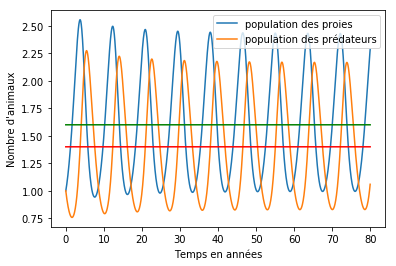

In [65]:
plt.plot(t, x1, label='population des proies')
plt.plot(t, x2, label='population des prédateurs')
plt.plot(t, c/d*np.ones(len(t)), color = 'g')
plt.plot(t,a/b*np.ones(len(t)), color = 'r')
plt.xlabel('Temps en années')
plt.ylabel("Nombre d'animaux")
plt.legend();

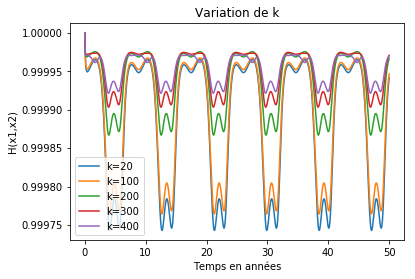

In [66]:
t, [x1, x2] = solve_euler_implicit_H(g, 90, np.array([1, 1]), 0.01, 0, 50)
plt.plot(t, H(x1,x2), label=f'k=20')
plt.legend();
for i in range(100, 500, 100):
    t, [x1, x2] = solve_euler_implicit_H(g, i, np.array([1, 1]), 0.01, 0, 50)
    plt.plot(t, H(x1,x2), label=f'k={i}')
    plt.legend()
plt.xlabel('Temps en années')
plt.ylabel("H(x1,x2)")
plt.title('Variation de k');

Plus $k$ augmente, plus $H(x_1, x_2)$ s'éloigne de $H_0$ et moins elle est constante.

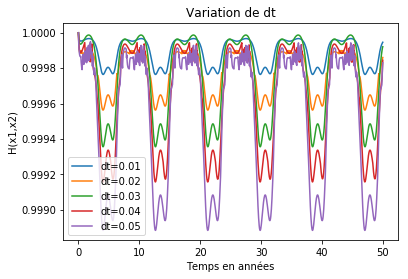

In [67]:
for i in range(1, 6):
    t, [x1, x2] = solve_euler_implicit_H(g, 100, np.array([1, 1]), i*0.01, 0, 50)
    plt.plot(t, H(x1,x2), label=f'dt={i*0.01}')
    plt.legend()
plt.xlabel('Temps en années')
plt.ylabel("H(x1,x2)")
plt.title('Variation de dt');

De même, plus $dt$ augmente, plus $H(x_1, x_2)$ s'éloigne de $H_0$ et moins elle est constante.

$k$ traduisant la vitesse de convergence de $H(x_1, x_2)$ vers $H_0$, on serait tenté de le choisir arbitrairement grand. Montrons que cela n'est cependant pas optimal.

On note $x_i$ le $i-$ème point retourné par l'algorithme.

La méthode d'Euler implicite demandant plusieurs itérations pour calculer un $x_i$, on note $x_i^j$ l'approximation de $x_i$ calculée à la $j-$ème itération de la boucle $\verb?while?$.

$x_i^{j+1} = x_{i-1} + dt \times (f(t_i, x_i^j)) - k \nabla H(x_i^j)(H(x_i^j)-H(x_0))$ et $x_i^{j} = x_{i-1} + dt \times (f(t_i, x_i^{j-1})) - k \nabla H(x_i^{j-1})(H(x_i^{j-1})-H(x_0))$

Donc : (1)

$$
\begin{align}
x_i^{j+1} - x_i^j 
    &= x_{i-1} + dt \times (f(t_i, x_i^j) - k \nabla H(x_i^j)(H(x_i^j)-H(x_0)))- (x_{i-1}+dt \times (f(t_i, x_i^{j-1}) - k \nabla H(x_i^{j-1})(H(x_i^{j-1})-H(x_0))))\\
    &= dt(f(t_i, x_i^j) - f(t_i, x_i^{j-1}) - k (\nabla H(x_i^j)(H(x_i^j)-H(x_0)) -\nabla H(x_i^{j-1})(H(x_i^{j-1})-H(x_0))))\\

\end{align}
$$

Or :

$
\begin{align}
f_1(t_i, x_i^j) - f_1(t_i, x_i^{j-1}) 
    &= x_{1i}^j(\alpha - \beta x_{2i}^j) - x_{1i}^{j-1}(\alpha - \beta x_{2i}^{j-1})\\
    &= \alpha (x_{1i}^j - x_{1i}^{j-1}) - \beta (x_{1i}^jx_{2i}^j - x_{1i}^{j-1}x_{2i}^{j-1})\\
    &= O(dt)
\end{align}
$

car d'après le calcul (1) : $ x_{i}^j - x_{i}^{j-1} = O(dt)$ et $x_{1i}^jx_{2i}^j - x_{1i}^{j-1}x_{2i}^{j-1}=x_{1i}^jx_{2i}^j-(x_{1i}^j+O(dt))(x_{2i}^j+O(dt)=O(dt)$

De même, $f_2(t_i, x_i^j) - f_2(t_i, x_i^{j-1}) = O(dt)$, donc $f(t_i, x_i^j) - f(t_i, x_i^{j-1}) = O(dt)$.


Ainsi en se limitant à l'ordre 1 en dt, $x_i^{j+1} - x_i^j = -dt\times k (\nabla H(x_i^j)(H(x_i^j)-H(x_0)) -\nabla H(x_i^{j-1})(H(x_i^{j-1})-H(x_0)))) + o(dt)$.

**$x_i^{j+1} - x_i^j$ est donc proportionnel à $k$.**


Or les itérations de la boucle $\verb?while?$ s'arrêtent lorsque $|\frac{x_i^{j+1} - x_i^j}{x_i^j}|\le \varepsilon$. Augmenter fortement $k$ revient à augmenter l'écart entre $x_i^{j+1}$ et $x_i^j$ soit à augmenter le nombre d'itérations dans la boucle $\verb?while?$.

Dans un premier temps, ceci va avoir uniquement pour effet d'augmenter le temps de calcul.

Cependant, dans un second temps, si on continue à augmenter $k$, le nombre d'itérations nécessaires pour obtenir $|\frac{x_i^{j+1} - x_i^j}{x_i^j}|\le \varepsilon$ devient souvent supérieur à $\verb?itermax?$. La valeur trouvée pour $x_i$ est donc potentiellement éloignée de la véritable valeur et l'algoritme perd donc beaucoup en précision.